# 1. First Approach to the Dataset

## 1.1. Environment Setup and Python Libraries Installation

- **Nilearn:** to facilitate the processing and visualization of neuroimaging data.
- **Matplotlib and Seaborn:** for data visualization.
- **Numpy and Pandas:** for data manipulation and analysis.

In [1]:
!pip install nilearn numpy pandas matplotlib seaborn

## 1.2. Data Loading

We established the file path using the os library and loaded the downloaded ".1D" files using numpy.

In [44]:
import nilearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

"""
Las siguientes líneas de código deben modificarse para correr desde un contenedor Docker
"""

# Ruta de la carpeta actual (donde está el notebook)
current_folder = os.getcwd()

parent_folder = os.path.dirname(current_folder)

# Ruta relativa al archivo .nii.gz
relative_path = r'Dataset_ROIs_AAL_CCS_filt_noglobal/Caltech_0051456_rois_aal.1D'

# Construir la ruta completa usando os.path.join
file_path = os.path.join(parent_folder, relative_path)

time_series_data = np.loadtxt(file_path)

# Display the shape of the loaded data

atlas_dict = {
    31: "Cingulum_Ant_R",
    30: "Cingulum_Ant_L",
    29: "Insula_R",
    28: "Insula_L",
    41: "Amygdala_R",
    40: "Amygdala_L",
    34: "Cingulum_Post_L",
    35: "Cingulum_Post_R",
    72: "Putamen_L",
    73: "Putamen_R",
    70: "Caudate_L",
    71: "Caudate_R",
    74: "Pallidum_L",
    75: "Pallidum_R",
    36: "Hippocampus_L",
    37: "Hippocampus_R"
}

indices = list(atlas_dict.keys())

# Filtrar las columnas de time_series_data que corresponden a los índices del diccionario
filtered_time_series_data = time_series_data[:, indices]

# Mostrar la forma de los datos filtrados
print(filtered_time_series_data.shape)

print("Shape of the loaded data array:", time_series_data.shape)

print(time_series_data)


(145, 16)
Shape of the loaded data array: (145, 116)
[[7039.58496094 9013.60742188 5527.58203125 ... 3546.25
  5282.50537109 6146.91308594]
 [7039.40673828 9013.36425781 5527.59570312 ... 3548.40087891
  5283.90478516 6146.7265625 ]
 [7036.66455078 9009.55957031 5528.86572266 ... 3544.45043945
  5278.00195312 6150.76220703]
 ...
 [7031.11132812 9004.52148438 5521.82324219 ... 3634.96923828
  5378.97851562 6153.30126953]
 [7040.75390625 9015.99902344 5522.64550781 ... 3599.42260742
  5329.28222656 6142.60205078]
 [7049.0234375  9026.19921875 5526.52880859 ... 3525.44091797
  5263.59960938 6146.12597656]]


## 1.3. Visualize the DataWe can visualize the rs-fMRI signal of on subject to get an initial understanding of the data.

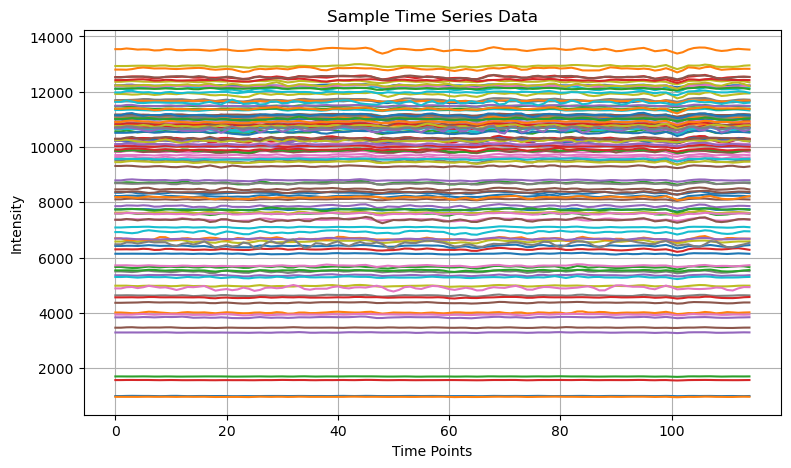

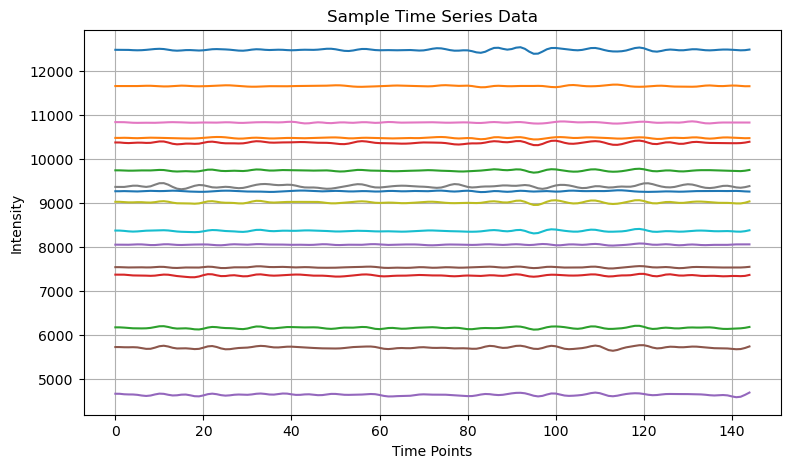

In [54]:
# Plotting the time series data
plt.figure(figsize=(9, 5))
plt.plot(time_series_data)
plt.xlabel('Time Points')
plt.ylabel('Intensity')
plt.title('Sample Time Series Data')
plt.grid(True)
plt.show()

plt.figure(figsize=(9, 5))
plt.plot(filtered_time_series_data)
plt.xlabel('Time Points')
plt.ylabel('Intensity')
plt.title('Sample Time Series Data')
plt.grid(True)
plt.show()

## 1.3.1 A look at the AAL Atlas used in this brain parcellation:

/home/agustinnr/nilearn_data/aal_SPM12/aal/atlas/AAL.nii
/home/agustinnr/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale122.nii.gz
116
Atlas labels: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'C

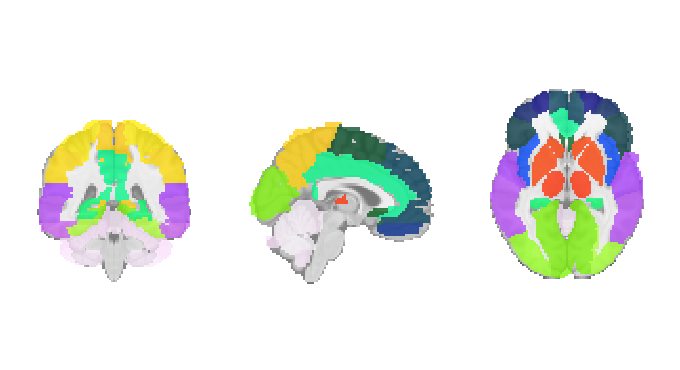

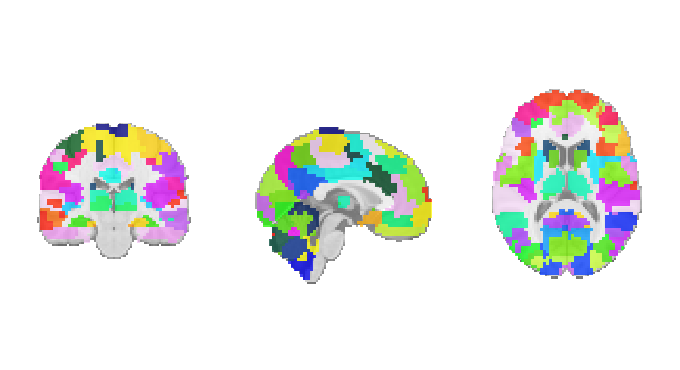

In [46]:
from nilearn import datasets
from nilearn import plotting
# Load the atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps
atlas_labels = atlas.labels
atlas_indices = atlas.indices
atlas_description = atlas.description  
print(atlas_filename)
plotting.plot_roi(atlas_filename, draw_cross=False, annotate=False, alpha=0.75)

parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
aal_atlas_filename = parcellations.scale122
#possible scales:007,012,020,064,122,197,325,444
print(aal_atlas_filename)

plotting.plot_roi(aal_atlas_filename, draw_cross=False, annotate=False, alpha=0.75)
print(len(atlas_labels))
print("Atlas labels:", atlas_labels)

# 1.4. Individual Correlation Matrix

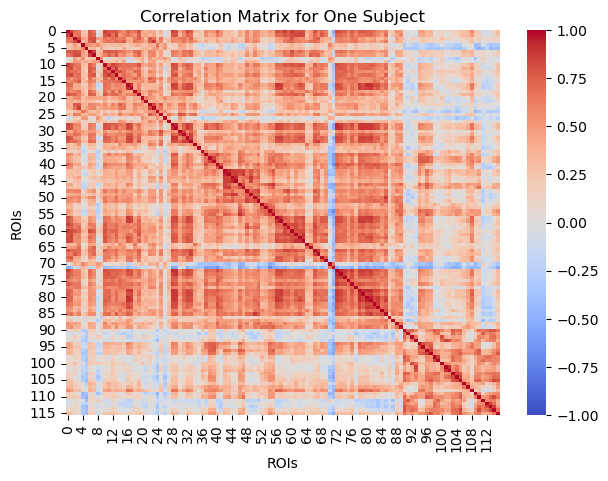

In [47]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(time_series_data.T)  # Transpose so that rows represent different ROIs

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for One Subject')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

# 1.5. Cleaning the Individual Correlation Matrix

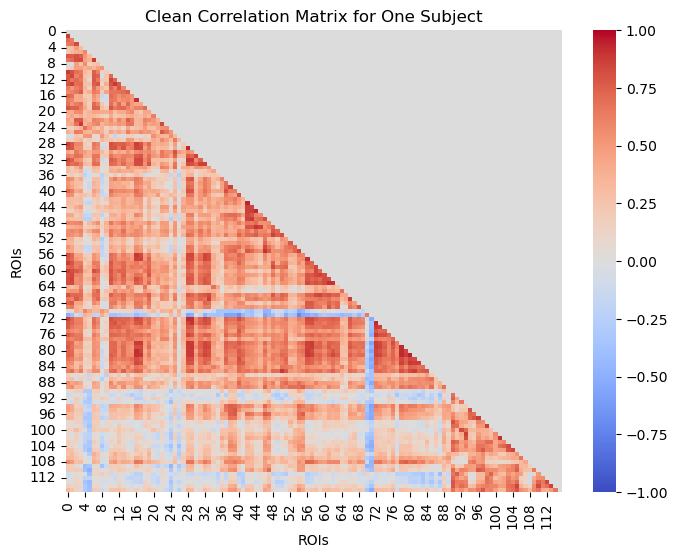

In [48]:
#Plotting just the lower triangule of the correlation matrix:
lower_triangule = np.tril(correlation_matrix, k=-1)

plt.figure(figsize=(8, 6))
sns.heatmap(lower_triangule, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Clean Correlation Matrix for One Subject')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


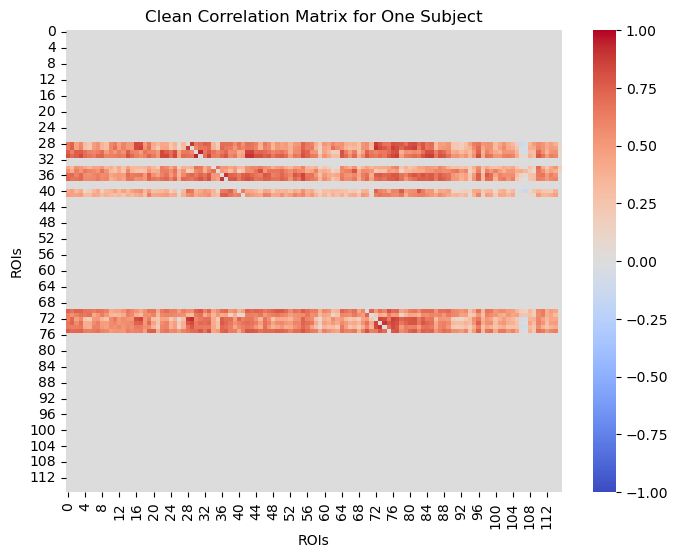

In [71]:
# Crear una lista de todos los índices (0 a 115)
all_indices = set(range(116))

# Obtener los índices que queremos mantener
valid_indices = set(atlas_dict.keys())

# Crear una máscara para las filas y columnas que deben ser enmascaradas
mask_indices = all_indices - valid_indices

# Convertir la máscara a una lista
mask_indices = list(mask_indices)

# Enmascarar las filas y columnas no deseadas con ceros
correlation_matrix[mask_indices, :] = 0
#lower_triangule[:, mask_indices] = 0
np.fill_diagonal(correlation_matrix, 0)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Clean Correlation Matrix for One Subject')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

# 1.6. Vectorizing the Cleaned Individual Correlation Matrix

#### This method ordered rows-wise from the lower triangular matrix. Specifically, the order follows:

- All elements from the first row below the diagonal.
- All elements from the second row below the diagonal.
- And so on, up to the last row.

In [73]:
print(correlation_matrix)
vectorized_correlation_matrix = correlation_matrix.flatten()

print("Vector with the elements of one subject correlation matrix (without the diagonal):\n", vectorized_correlation_matrix[:150])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vector with the elements of one subject correlation matrix (without the diagonal):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


# 1.7. Checking the Quality of the Vector

In [74]:
vector = vectorized_correlation_matrix
print(f"Data type: {vector.dtype}")
print(f"Min value: {np.min(vector)}")
print(f"Max value: {np.max(vector)}")
print(f"Mean value: {np.mean(vector)}")
print(f"Standard deviation: {np.std(vector)}")
print(f"Lenght: {len(vector)}")
# Check for NaNs
print(f"Any NaNs in data: {np.isnan(vector).any()}")
print("---"*8)
print("First 7 values of the vector:")
print(vector[:6])

Data type: float64
Min value: -0.13908849321510208
Max value: 0.9385233044342834
Mean value: 0.06993789128161255
Standard deviation: 0.18948914558615518
Lenght: 13456
Any NaNs in data: False
------------------------
First 7 values of the vector:
[0. 0. 0. 0. 0. 0.]


# 2. Initial DataFrame

## 2.1. Loop to create the initial DataFrame

In [75]:
from IPython.display import display
# Obtener la ruta del directorio actual y el directorio padre
current_folder = os.getcwd()
parent_folder = os.path.dirname(current_folder)

# Definir el archivo CSV y su ruta
original_csv_file = 'Phenotypic_V1_0b_preprocessed1.csv'
original_csv_path = os.path.join(current_folder, original_csv_file)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(original_csv_path, sep=";")

# Nombres de las ROIs del atlas AAL (asegúrate de que 'atlas.labels' esté definido correctamente en tu código)
roi_names = atlas.labels

# Inicializar una lista para almacenar los vectores del triángulo inferior de las matrices de correlación
vectorized_data = []

# Inicializar contadores
count_valid = 0
count_stddev_error = 0
count_file_error = 0

# Recorrer cada fila del DataFrame y calcular la matriz de correlación, eliminando las filas donde no existe el archivo
for index, row in df.iterrows():
    file_id_value = row['FILE_ID']
    relative_path = f'Dataset_ROIs_AAL_CCS_filt_noglobal/{file_id_value}_rois_aal.1D'
    file_path = os.path.join(parent_folder, relative_path)
    
    # Verificar si el archivo existe
    if os.path.exists(file_path):
        try:
            # Cargar los datos de la serie temporal
            time_series_data = np.loadtxt(file_path)

            # Verificar que no haya series con desviación estándar cero
            if np.any(np.std(time_series_data, axis=0) == 0):
                raise ValueError("Desviación estándar cero encontrada en alguna serie temporal")
                
            
            # Calcular el vector del triángulo inferior de la matriz de correlación
            correlation_matrix = np.corrcoef(time_series_data.T)
            all_indices = set(range(116))

            # Obtener los índices que queremos mantener
            valid_indices = set(atlas_dict.keys())
            
            # Crear una máscara para las filas y columnas que deben ser enmascaradas
            mask_indices = all_indices - valid_indices
            
            # Convertir la máscara a una lista
            mask_indices = list(mask_indices)
            
            # Enmascarar las filas y columnas no deseadas con ceros
            correlation_matrix[mask_indices, :] = 0
            #lower_triangule[:, mask_indices] = 0
            np.fill_diagonal(correlation_matrix, 0)
            
            vectorized_correlation_matrix = correlation_matrix.flatten()
            vectorized_data.append(vectorized_correlation_matrix)
            count_valid += 1
        except Exception as e:
            #print(f"Error procesando el archivo: {file_path}\n{e}")
            df.drop(index, inplace=True)
            count_stddev_error += 1
    else:
        # Eliminar la fila si el archivo no existe
        df.drop(index, inplace=True)
        count_file_error += 1

# Crear un DataFrame con los vectores del triángulo inferior
vectorized_df = pd.DataFrame(vectorized_data)
#indices_row = ["Index"] + list(range(1, len(vectorized_df.columns) + 1))
#vectorized_df.loc[-1] = indices_row  # Insertar la fila al inicio
#vectorized_df.index = vectorized_df.index + 1  # Desplazar el índice

# Guardar el DataFrame `df` actualizado en el archivo CSV original
#df = df.set_axis(df.iloc[0], axis=1)
df = df.drop(df.columns[[0, 1]], axis=1)
pheno_df = df.set_index(df.columns[0])

clean_csv_path = os.path.join(current_folder, 'Phenotypic_simplified_clean.csv')
pheno_df.to_csv(clean_csv_path, sep=",", index=False)

# Imprimir la longitud del vectorizado para el diagnóstico
if vectorized_data:
    print(f"vectorized_correlation_matrix len: {len(vectorized_correlation_matrix)}")

print(f"Files not found: {count_file_error}")
print(f"Std Dev Error: {count_stddev_error}")
    

# Guardar el DataFrame en un archivo CSV
output_csv_path = os.path.join(current_folder, 'vectorized_correlations.csv')
vectorized_df.to_csv(output_csv_path, index=False)

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

# Mostrar el DataFrame en Jupyter Notebook
display(vectorized_df)
display(pheno_df)

vectorized_lower_triangle len: 13456
Files not found: 228
Std Dev Error: 64


,0,1,2,3,4,5,6,7,8,9,...,13446,13447,13448,13449,13450,13451,13452,13453,13454,13455
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
SUB_ID,,,,,,,,,,,,,,,,,,,,,
50005,4,50005,PITT,Pitt_0050005,1,1,13.73,2,R,NaN,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0.0
50006,5,50006,PITT,Pitt_0050006,1,1,13.37,1,L,NaN,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1.0
50008,7,50008,PITT,Pitt_0050008,1,1,32.45,1,R,NaN,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1.0
50009,8,50009,PITT,Pitt_0050009,1,1,33.86,1,R,NaN,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,1.0
50010,9,50010,PITT,Pitt_0050010,1,1,35.20,1,L,NaN,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51574,1099,51574,SBL,SBL_0051574,1,2,30.00,1,NaN,100.0,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0.0
51576,1101,51576,SBL,SBL_0051576,1,3,31.00,1,NaN,80.0,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0.0
51581,1106,51581,SBL,SBL_0051581,1,3,64.00,1,NaN,100.0,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0.0


## 2.2. Creating the ROIs' labels combinations vector:

In [53]:
# Obtener el número de etiquetas
n_labels = len(atlas_labels)
print(n_labels)
# Crear una matriz vacía de dimensiones (n_labels x n_labels)
labels_matrix = np.empty((n_labels, n_labels), dtype=object)

# Rellenar la matriz con las combinaciones
for i in range(n_labels):
    for j in range(n_labels):
        labels_matrix[i, j] = f"{atlas_labels[i]} x {atlas_labels[j]}"

lower_triangle_labels = np.tril_indices(labels_matrix.shape[0], k=-1)
vectorized_lower_triangle_labels = labels_matrix[lower_triangle_labels]

print(vectorized_lower_triangle_labels)
print(len(vectorized_lower_triangle_labels))

116
['Precentral_R x Precentral_L' 'Frontal_Sup_L x Precentral_L'
 'Frontal_Sup_L x Precentral_R' ... 'Vermis_10 x Vermis_7'
 'Vermis_10 x Vermis_8' 'Vermis_10 x Vermis_9']
6670


## 2.3. Appending the ROIs' labels combinations vector to our dataframe:

In [13]:
'''
if not any((vectorized_df.values == vectorized_lower_triangle_labels).all(1)):
    # Insertar el vectorized_lower_triangle_labels como la primera fila
    first_row_df = pd.DataFrame([vectorized_lower_triangle_labels], columns=vectorized_df.columns)
    vectorized_df = pd.concat([first_row_df, vectorized_df], ignore_index=True)

display(first_row_df)

display(vectorized_df)
'''

'\nif not any((vectorized_df.values == vectorized_lower_triangle_labels).all(1)):\n    # Insertar el vectorized_lower_triangle_labels como la primera fila\n    first_row_df = pd.DataFrame([vectorized_lower_triangle_labels], columns=vectorized_df.columns)\n    vectorized_df = pd.concat([first_row_df, vectorized_df], ignore_index=True)\n\ndisplay(first_row_df)\n\ndisplay(vectorized_df)\n'

## 2.4. Setting the ROIs' labels as horizontal index:

In [14]:
'''
vectorized_df = vectorized_df.set_axis(vectorized_df.iloc[0], axis=1)

# Eliminar la primera fila después de establecerla como índice
vectorized_df = vectorized_df.drop(vectorized_df.index[0])
display(vectorized_df)
'''

'\nvectorized_df = vectorized_df.set_axis(vectorized_df.iloc[0], axis=1)\n\n# Eliminar la primera fila después de establecerla como índice\nvectorized_df = vectorized_df.drop(vectorized_df.index[0])\ndisplay(vectorized_df)\n'

# Dropping the columns without importance:

In [77]:
clean_vectorized_df = vectorized_df.loc[:, (vectorized_df != 0).any(axis=0)]
display(clean_vectorized_df)

,3248,3249,3250,3251,3252,3253,3254,3255,3256,3257,...,8806,8807,8808,8809,8810,8811,8812,8813,8814,8815
0,0.621857,0.627038,0.373694,0.366489,0.509516,0.336139,0.602672,0.552359,0.393741,0.307774,...,0.490193,0.363813,0.409680,0.374305,0.611860,0.690650,0.517744,0.667042,0.657802,-0.273694
1,0.660433,0.687811,0.364191,0.351223,0.127844,-0.121875,0.713468,0.441580,-0.040824,-0.031378,...,0.024681,0.012933,0.376014,0.457746,0.316124,0.285455,0.243897,0.213081,-0.151902,0.091279
2,0.718794,0.550122,0.436109,0.395859,0.125182,0.266539,0.509583,0.320793,0.293049,0.177971,...,0.098366,0.013769,0.259215,0.323768,0.516959,0.294774,0.388829,0.410795,0.375430,-0.191813
3,0.620206,0.595155,0.397691,0.339354,0.413601,0.190834,0.468643,0.169333,0.549011,-0.127934,...,-0.045104,-0.049948,0.453284,0.083526,-0.012874,0.416618,0.313808,0.290489,0.146277,-0.000936
4,0.545957,0.324751,0.187662,-0.047091,0.340547,-0.045218,0.173655,0.054272,0.238352,-0.271741,...,0.336013,0.018636,0.218315,0.270399,0.160477,0.490096,0.264150,0.354877,0.135736,-0.052984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.372306,0.310215,0.264473,0.089323,0.168567,0.296827,0.355923,0.098593,0.333742,0.338840,...,0.515631,0.507322,-0.083905,-0.082895,0.379926,0.173559,0.333180,0.410044,0.479566,0.321779
816,0.593180,0.714287,0.316644,0.403570,0.370019,0.315980,0.561372,0.570296,0.381103,0.369252,...,0.032248,-0.257155,0.144760,0.256774,0.425410,0.425372,0.297198,0.239576,-0.010193,-0.089052
817,0.372031,0.390166,-0.075942,-0.225010,-0.078798,-0.140986,0.174407,0.017288,-0.174113,-0.150005,...,-0.079247,-0.063368,0.211952,0.118522,0.241635,0.336760,0.132511,0.173687,-0.110981,0.100958
818,0.299098,0.222917,-0.165495,-0.229957,0.201206,0.119390,0.297866,-0.139012,0.036447,-0.004962,...,-0.066876,0.443511,0.244129,0.070119,0.157418,0.504286,0.365731,0.142787,0.233925,-0.168436


# 3. PCA - Principal Components Analysis:

Variance explained by each component: [0.35942887 0.03623894 0.02669203 0.02222607 0.01967577 0.01761636
 0.01489866 0.01398911 0.01281449 0.01257251 0.01149436 0.01073969
 0.00991622 0.00898719 0.0084244  0.00827307 0.00752183 0.00728745
 0.00665688 0.00655229 0.00609504 0.00589115 0.00564143 0.00545498
 0.0049505  0.00483296 0.00473516 0.00456462 0.00437201 0.00423692
 0.00393752 0.00387617 0.00380916 0.00375518 0.00355581 0.00351701
 0.00343355 0.00331638 0.00328512 0.00320883 0.00311033 0.00299547
 0.00293558 0.00282808 0.00277367 0.00272517 0.0027072  0.00263903
 0.00261266 0.00250715 0.00248957 0.00244722 0.0024068  0.00238229
 0.00231766 0.00230372 0.00228276 0.00223488 0.00220149 0.00217522
 0.00212071 0.00210714 0.00206633 0.00204208 0.00201664 0.00199887
 0.00195962 0.00192827 0.00191788 0.00187798 0.00183681 0.00183219
 0.00180066 0.0017756  0.00175763 0.00174123 0.00168439 0.00167935
 0.00165989 0.0016408  0.00160863 0.00156963 0.00155673 0.00155073
 0.00152159 0.00150251 0

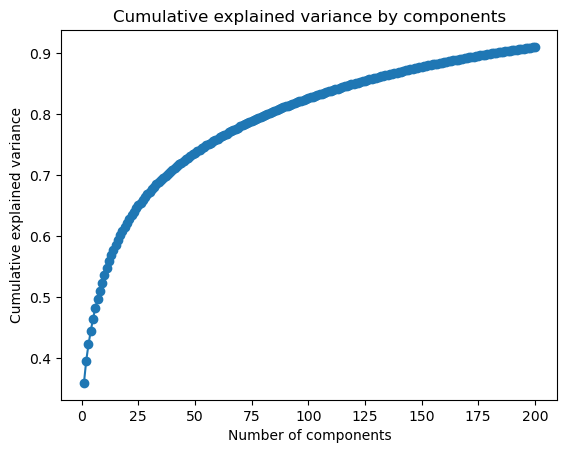

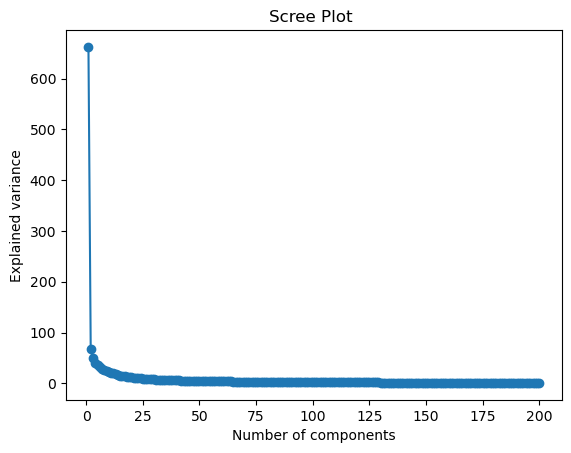

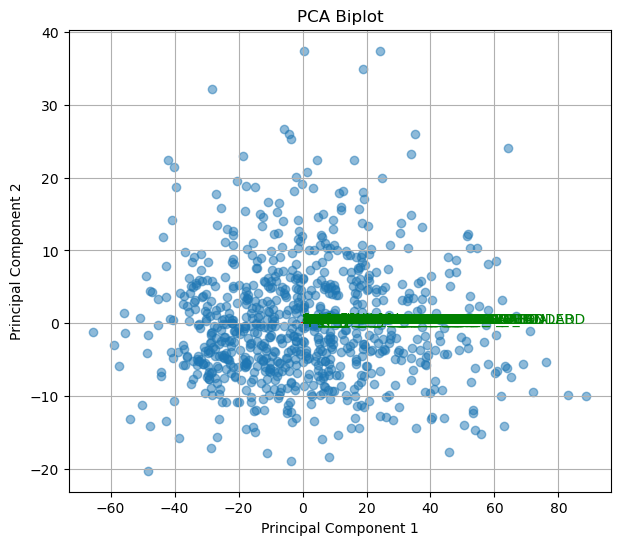

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_vectorized_df)

n_components = 200  # por ejemplo, elige el número que consideres adecuado

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print("Variance explained by each component:", explained_variance)

# Grafica la varianza explicada acumulada para ayudarte a decidir el número de componentes
plt.plot(range(1, n_components + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance by components')
plt.show()

#Scree Plot 
plt.plot(range(1, n_components + 1), pca.explained_variance_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree Plot ')
plt.show()

#Biplot
pca_biplot = PCA(n_components=2)  # Utiliza solo 2 componentes principales para el biplot
principal_components = pca_biplot.fit_transform(scaled_data)

pca_components_df = pd.DataFrame(principal_components, columns=['Component 1', 'Component 2'])

plt.figure(figsize=(7, 6))
plt.scatter(pca_components_df['Component 1'], pca_components_df['Component 2'], alpha=0.5)
for i, feature in enumerate(df.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, feature, color='g')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid()
plt.show()

# XGBoost

In [16]:
!pip install xgboost

In [80]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = clean_vectorized_df
pheno_df['DX_GROUP'] = pheno_df['DX_GROUP'].replace(2, 0)
y = pheno_df['DX_GROUP']
display(y)

value_counts = y.value_counts()
print("Value Counts:")
print(value_counts)

SUB_ID
50005    1
50006    1
50008    1
50009    1
50010    1
        ..
51574    1
51576    1
51581    1
51606    1
51607    1
Name: DX_GROUP, Length: 820, dtype: int64

Value Counts:
DX_GROUP
0    445
1    375
Name: count, dtype: int64


Train Accuracy: 1.0
Accuracy: 0.5975609756097561
F1 Score: 0.46774193548387094
ROC AUC: 0.6519850187265918
Gini Coefficient: 0.3039700374531835
Confusion Matrix:
[[69 20]
 [46 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        89
           1       0.59      0.39      0.47        75

    accuracy                           0.60       164
   macro avg       0.60      0.58      0.57       164
weighted avg       0.60      0.60      0.58       164



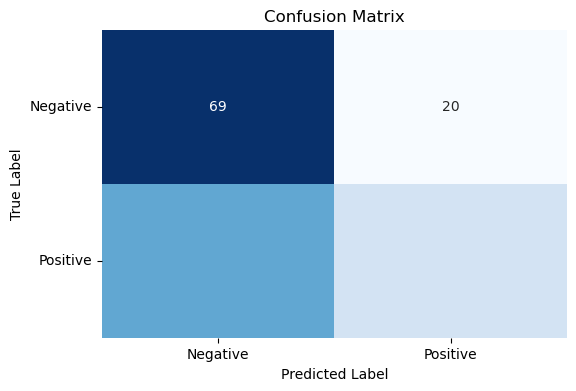

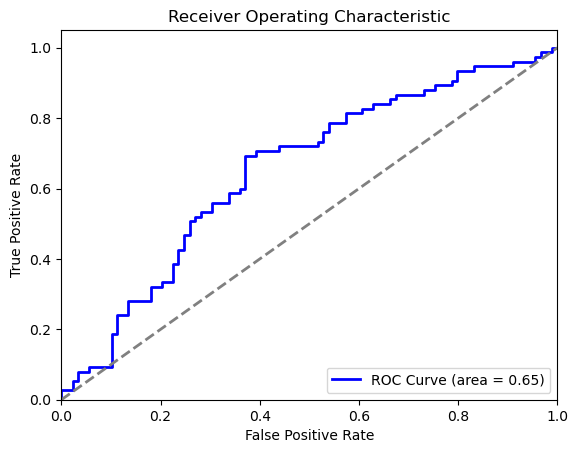

In [98]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Number of boosting rounds
num_round = 100

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round)

# Predict on the test set
y_pred_prob = xgb_model.predict(dtest)
y_pred = y_pred_prob.round()

y_pred_prob_train = xgb_model.predict(dtrain)
y_pred_train = y_pred_prob_train.round()

# Evaluate the accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional Metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * roc_auc - 1
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Gini Coefficient: {gini}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [84]:
"""
importance = xgb_model.get_score(importance_type='weight')

importance_indices = [int(key[1:]) for key in importance.keys()]
importance_df = pd.DataFrame({
    'Feature':[vectorized_lower_triangle_labels[idx] for idx in importance_indices],
    'Importance': list(importance.values())
})
display(importance_df)
# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limitar a las 20 características más importantes
top_n = 20
top_features = importance_df.head(top_n)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance')
plt.gca().invert_yaxis()  # Mostrar las características más importantes primero
plt.show()
"""

"\nimportance = xgb_model.get_score(importance_type='weight')\n\nimportance_indices = [int(key[1:]) for key in importance.keys()]\nimportance_df = pd.DataFrame({\n    'Feature':[vectorized_lower_triangle_labels[idx] for idx in importance_indices],\n    'Importance': list(importance.values())\n})\ndisplay(importance_df)\n# Ordenar las características por importancia\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)\n\n# Limitar a las 20 características más importantes\ntop_n = 20\ntop_features = importance_df.head(top_n)\n\n# Visualizar la importancia de las características\nplt.figure(figsize=(12, 8))\nplt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title(f'Top {top_n} Feature Importance')\nplt.gca().invert_yaxis()  # Mostrar las características más importantes primero\nplt.show()\n"

# XGBoost + PCA

Accuracy: 0.4878048780487805
F1 Score: 0.35384615384615387
ROC AUC: 0.4614254792826221
Gini Coefficient: -0.07714904143475576
Confusion Matrix:
[[57 41]
 [43 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58        98
           1       0.36      0.35      0.35        66

    accuracy                           0.49       164
   macro avg       0.46      0.47      0.46       164
weighted avg       0.49      0.49      0.49       164



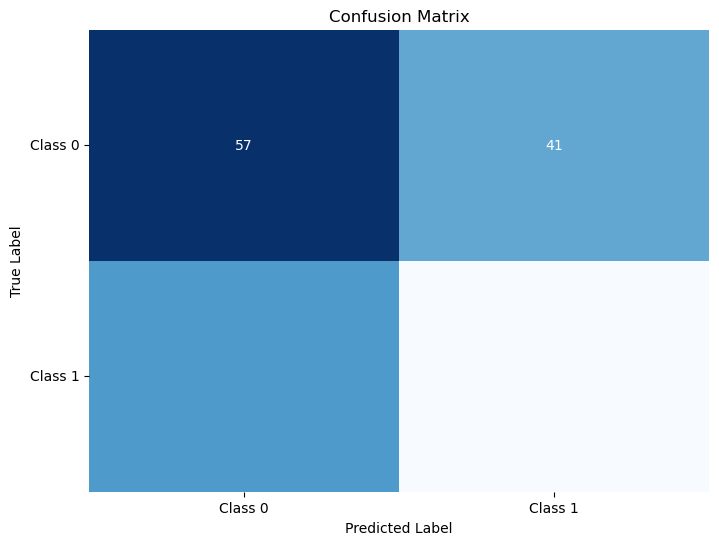

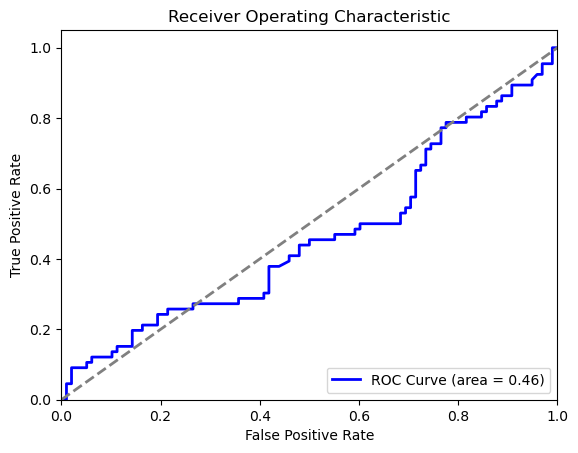

In [99]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Number of boosting rounds
num_round = 100

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round)

# Predict on the test set
y_pred_prob = xgb_model.predict(dtest)
y_pred = y_pred_prob.round()

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional Metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * roc_auc - 1
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Gini Coefficient: {gini}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)  # Ensure the x-ticks are horizontal
plt.yticks(rotation=0)  # Ensure the y-ticks are horizontal
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [86]:
"""
# Obtener la importancia de las características
importance = xgb_model.get_score(importance_type='weight')

importance_indices = [int(key[1:]) for key in importance.keys()]
importance_df = pd.DataFrame({
    'Feature':[vectorized_lower_triangle_labels[idx] for idx in importance_indices],
    'Importance': list(importance.values())
})
display(importance_df)
# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limitar a las 20 características más importantes
top_n = 20
top_features = importance_df.head(top_n)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance')
plt.gca().invert_yaxis()  # Mostrar las características más importantes primero
plt.show()
"""

"\n# Obtener la importancia de las características\nimportance = xgb_model.get_score(importance_type='weight')\n\nimportance_indices = [int(key[1:]) for key in importance.keys()]\nimportance_df = pd.DataFrame({\n    'Feature':[vectorized_lower_triangle_labels[idx] for idx in importance_indices],\n    'Importance': list(importance.values())\n})\ndisplay(importance_df)\n# Ordenar las características por importancia\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)\n\n# Limitar a las 20 características más importantes\ntop_n = 20\ntop_features = importance_df.head(top_n)\n\n# Visualizar la importancia de las características\nplt.figure(figsize=(12, 8))\nplt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title(f'Top {top_n} Feature Importance')\nplt.gca().invert_yaxis()  # Mostrar las características más importantes primero\nplt.show()\n"

# LDA

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = clean_vectorized_df
pheno_df['DX_GROUP'] = pheno_df['DX_GROUP'].replace(2, 0)
y = pheno_df['DX_GROUP']
display(y)

SUB_ID
50005    1
50006    1
50008    1
50009    1
50010    1
        ..
51574    1
51576    1
51581    1
51606    1
51607    1
Name: DX_GROUP, Length: 820, dtype: int64

Accuracy: 0.55
F1-score: 0.55
Confusion Matrix:
[[56 42]
 [32 34]]


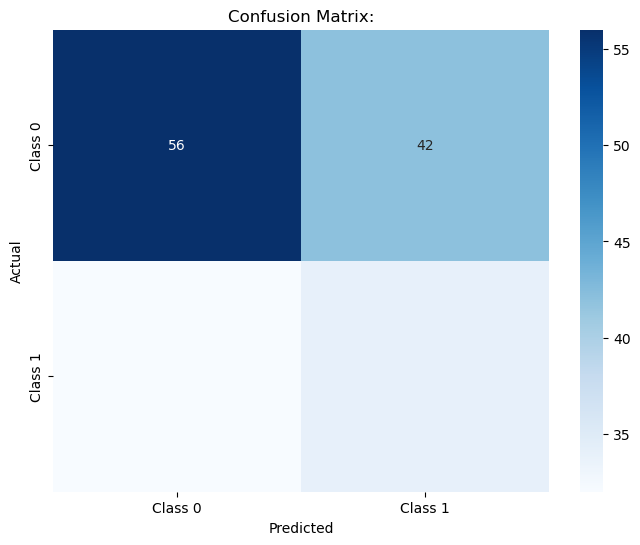

ROC AUC: 0.63
Gini coefficient: 0.25
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.57      0.60        98
     Class 1       0.45      0.52      0.48        66

    accuracy                           0.55       164
   macro avg       0.54      0.54      0.54       164
weighted avg       0.56      0.55      0.55       164



ValueError: y should be a 1d array, got an array of shape (164, 2) instead.

In [88]:
from sklearn.preprocessing import label_binarize


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo LDA
lda = LinearDiscriminantAnalysis()

# Ajustar el modelo a los datos de entrenamiento
lda.fit(X_train, y_train)

# Predecir las clases del conjunto de prueba
y_pred = lda.predict(X_test)
y_pred_prob = lda.predict_proba(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix:')
plt.show()

# Binarizar las etiquetas para ROC AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcular el AUC para cada clase
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'ROC AUC: {auc:.2f}')

# Calcular el Gini coefficient
gini = 2 * auc - 1
print(f'Gini coefficient: {gini:.2f}')

# Calcular el reporte de clasificación
classification_rep = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(f'Classification Report:\n{classification_rep}')

roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [24]:
xgb?

Type:        module
String form: <module 'xgboost' from '/home/agustinnr/miniconda3/lib/python3.12/site-packages/xgboost/__init__.py'>
File:        ~/miniconda3/lib/python3.12/site-packages/xgboost/__init__.py
Docstring:  
XGBoost: eXtreme Gradient Boosting library.

Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md

In [33]:
print("Atlas labels:", atlas_labels[31],atlas_labels[30],
      atlas_labels[29],atlas_labels[28],
      atlas_labels[41],atlas_labels[40],
      atlas_labels[34],atlas_labels[35],
      atlas_labels[72],atlas_labels[73],
      atlas_labels[70],atlas_labels[71],
      atlas_labels[74],atlas_labels[75],
      atlas_labels[36],atlas_labels[37],
     )

Atlas labels: Cingulum_Ant_R Cingulum_Ant_L Insula_R Insula_L Amygdala_R Amygdala_L Cingulum_Post_L Cingulum_Post_R Putamen_L Putamen_R Caudate_L Caudate_R Pallidum_L Pallidum_R Hippocampus_L Hippocampus_R
